We want to implement a Markov chain algorithm

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from scipy.stats import norm

In [18]:
#Function to determine the next day weather given the current day
def forecast(d): #d is the current day
    next_d=2 #Initialise the next day
    t=np.random.uniform(0, 1) #Gives us the value for the choice
    if d==0: #If the day is sunny
        if t <= 0.1: #Today sunny tomorrow cloudy probability
            next_d=1
        else:
            next_d=0
    elif d==1: #If the day is cloudy
        if t <= 0.5: #Today cloudy tomorrow cloudy probability
            next_d=1
        else:
            next_d=0
    return next_d

In [19]:
#Set the initial conditions 1=cloudy and 0=sunny
day=1 #We start we a cloudy day

In [20]:
#Run the forecast for N days
sunny_counter=0
cloudy_counter=0
N=int(1e4)
for i in range(N):
    day=forecast(day)
    if day==0:
        sunny_counter += 1
    elif day==1:
        cloudy_counter += 1
print(sunny_counter)
print(cloudy_counter)

8300
1700


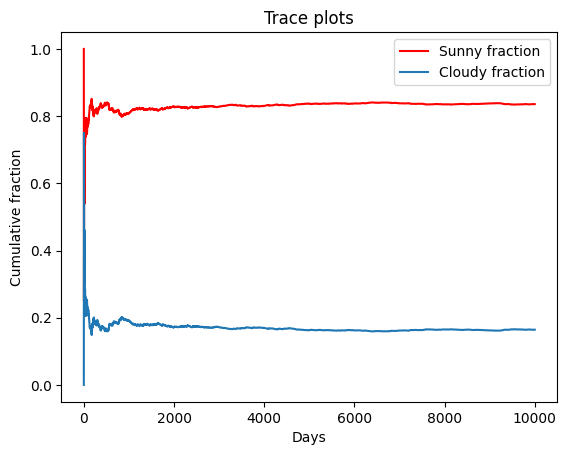

In [21]:
#Run the forecast for N days and plot relative fractions
sunny_frac=[]
cloudy_frac=[]
sunny_counter=0
cloudy_counter=0
for i in range(1, N):
    day=forecast(day)
    if day==0:
        sunny_counter += 1
    elif day==1:
        cloudy_counter += 1
        
    #Obtain the passive fraction for each day
    sunny_frac.append(sunny_counter/i)
    cloudy_frac.append(cloudy_counter/i)

#Let's do the plot
plt.plot(sunny_frac, color='r', label='Sunny fraction')
plt.plot(cloudy_frac, label='Cloudy fraction')
plt.xlabel(r'Days')
plt.ylabel(r'Cumulative fraction')
plt.title(r'Trace plots')
plt.legend()

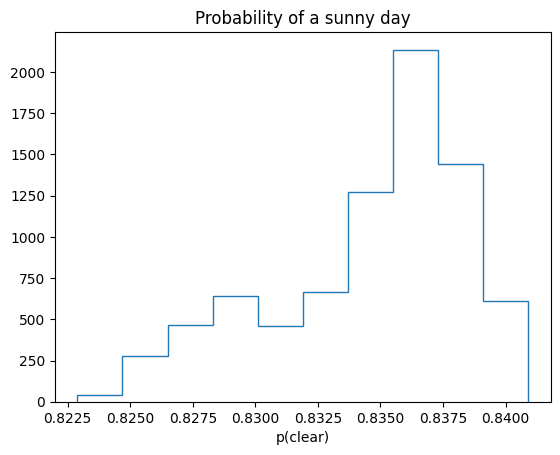

In [22]:
#Histogram of p(clear) rejecting the first 2000 days
plt.hist(sunny_frac[2000::], histtype = 'step')[2]
plt.title(r'Probability of a sunny day')
plt.xlabel(r'p(clear)')
plt.show()

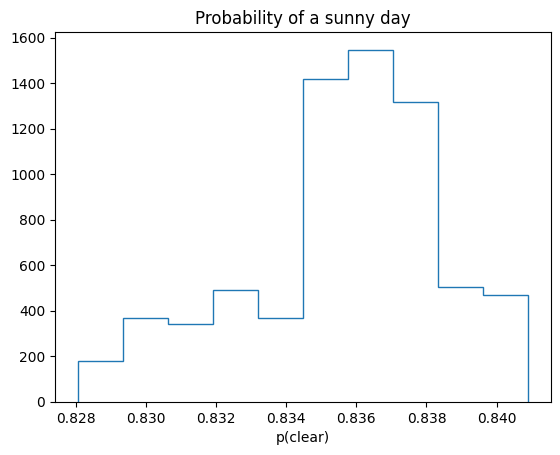

In [23]:
#Histogram of p(clear) rejecting the first 3000 days
plt.hist(sunny_frac[3000::], histtype = 'step')[2]
plt.title(r'Probability of a sunny day')
plt.xlabel(r'p(clear)')
plt.show()

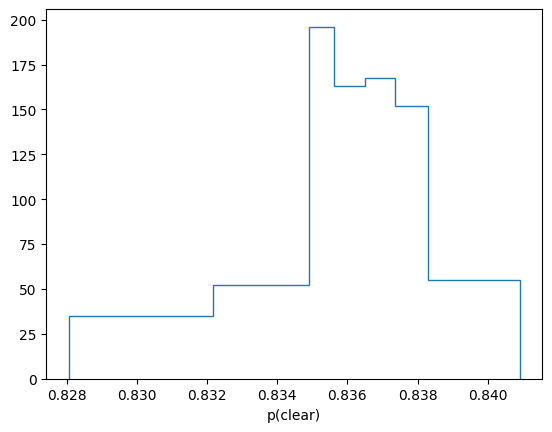

In [24]:
#Re-do the historam with adjustable bins
bins1000 = np.append(np.sort(sunny_frac[3000::])[::1000], np.max(sunny_frac[3000::])) #Create the specific bins
plt.hist(sunny_frac[3000::], bins=bins1000, density=True, histtype="step")
plt.xlabel(r'p(clear)')
plt.show()

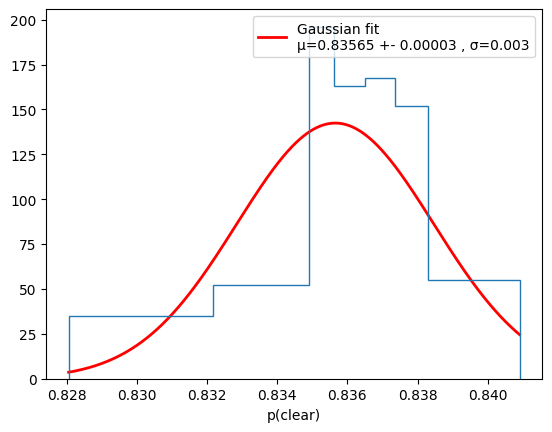

In [29]:
#Compare the results with a summary statistics
from decimal import Decimal

mu=np.mean(sunny_frac[3000::])
sigma=np.std(sunny_frac[3000::]) 
sigma_mu=sigma/np.sqrt(len(sunny_frac[3000::])) #Standard error on the mean


x = np.linspace(min(bins1000), max(bins1000), 1000)
pdf = norm.pdf(x, mu, sigma)

plt.plot(x, pdf, 'r-', linewidth=2, label=f'Gaussian fit\nμ={mu:.5f} +- {sigma_mu:.5f} , σ={sigma:.3f}')
plt.hist(sunny_frac[3000::], bins=bins1000, density=True, histtype="step")
plt.legend()
plt.xlabel(r'p(clear)')
plt.show()